# Lending Club Case Study

#### Created by:
  #### Manjunath- Facilitator
  #### Prashant Tyagi

### Company Overview: 
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

### Problem Statement:
The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.
In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.


There are four Steps involved in this solving this Case study:

1. Data Understanding- Here we understand what data is provided to us. What all Fields mean and how different data sets are linked.

2. Data Cleanup- There are several things to be done while cleaning up data such as- Proper encoding, treating Null Values, Removing special characters etc

3. Data Analysis- Perform Analysis to find patterns, information and values from Data.

4. Interpretation- Interpret results of Data Analysis into language that can be understood by End Users. 

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chardet
import datetime

## Import Data

In [2]:
#inspect the loan.csv file for encoding format
with open("loan.csv","rb") as rawdata:
    encformat = chardet.detect(rawdata.read())

print(encformat)



{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}


In [3]:
#Setting max col display to 500
pd.set_option('display.max_columns', 500)

In [4]:
loan = pd.read_csv('loan.csv',encoding = "utf-8",low_memory=False)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [5]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [6]:
loan.shape

(39717, 111)

Data Understanding:
1. There are 39717 Rows and 111 columns
2. Several Columns are blank
3. Several Columns have 0 values(which may or may not be correct)

## Data Cleaning and Preparation

In data cleaning and preparation process we are going to take these steps:

1. Remove columns that have null values only
2. Impute values in columns where there are more than 50% null values
3. Delete rows that have all values as 0 or null
4. Search and replace any soecial characters
5. Convert all alphabatical values to ower case
6. Check data type of columns and remove invalid data if any

In [7]:
# columns with percentage null values
round(loan.isnull().sum()/len(loan.index), 2)*100

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

#### Drop Null Columns/Rows
We can delete all columns that are null completely and rows also that have no values in them.

In [8]:
loan1 = loan.dropna(how='all')


In [9]:
loan= loan1.dropna(how='all', axis=1)

In [10]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [11]:
# after deleting null columns we have 57 columns left
loan.shape

(39717, 57)

In [12]:
# Checking percentage of null columns 
# we can delete those that have more than 50 percent null values as it would not 
#be correct data if we left it b lank or imputed it
round(loan.isnull().sum()/len(loan.index), 2)*100

id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      6.0
emp_length                     3.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          33.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
mths_since_last_deli

In [13]:
#Check percentage and drop columns
thresh = len(loan) * .5
loan.dropna(thresh = thresh, axis = 1, inplace = True)

<ipython-input-13-cf127728d357>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan.dropna(thresh = thresh, axis = 1, inplace = True)


In [14]:
loan.shape

(39717, 54)

In [15]:
round(loan.isnull().sum()/len(loan.index), 2)*100

id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      6.0
emp_length                     3.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          33.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
open_acc            

In [16]:
loan.to_csv(r'loan1.csv', index= 'False')

**acc_now_delinq, chargeoff_within_12_mths, delinq_amnt, pub_rec_bankruptcies, tax_liens:** has all values as 0 and can be removed

**application_type:**  All rows have value as INDIVIDUAL. This can be removed

**policy_code**- All rows have value as 1. This can be removed

**collections_12_mths_ex_med**- - All rows have value as 0 or blank. This can be removed

**out_prncp_inv, out_prncp**- 38577 records have value 0. It is more than 90%. these can be dropped 

**initial_list_status**- All rows have value as f. This can be removed

**delinq_2yrs**- 35K records have value 0. It may be removed, need to check more

**zip_code**- Does not provide enough information. Can use state to classify regions

**title, emp_title**-  may not be of much importance. See if there is any common value where most loans were defaulted.

**URL, description** have randon values- Can be dropped

**pymnt_plan**- All records have value n. Can be dropped

**emp_length**- Convert all values to whole numbers

**member_id, id**- these are just id fields and can be removed.



In [17]:
loan = loan.drop(['member_id', 'id','acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens','application_type','policy_code',
                  'collections_12_mths_ex_med','out_prncp_inv', 'out_prncp','initial_list_status','delinq_2yrs','zip_code', 'title', 'emp_title',
                 'url', 'desc','pymnt_plan'], axis=1)

## Univariate Analysis


Here we will analyze individual fields and convert them for better plotting


Changing Date format of all Date fields

In [18]:
loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')
loan.last_credit_pull_d = pd.to_datetime(loan.last_credit_pull_d, format='%b-%y')
loan.last_pymnt_d = pd.to_datetime(loan.last_pymnt_d, format='%b-%y')


### Calculating Credit Age
It is being calculated based on When Credit line was created.

In [19]:
#Capturing the month and year of earliest credit line
loan['cr_line_month'] = loan.earliest_cr_line.apply(lambda x: (str(x).split("-"))[0])

In [20]:
#Converting cr_line_month to a number 1-12
loan['cr_line_month'] = loan.cr_line_month.apply(lambda x: int( (datetime.datetime.strptime(x,'%b').strftime('%m'))))

In [21]:
#Capturing the month and year of earliest credit line
loan['cr_line_year'] = loan.earliest_cr_line.apply(lambda x: ((str(x).split("-"))[1]))

In [22]:
#Y2K fix for cr_line_year
loan['cr_line_year'] = loan.cr_line_year.apply(lambda x: int("20" + str(x)) if x <= '21' else int("19" + str(x)))

In [23]:
#Create python date concatenation function
def string_date (year,month):
    return(datetime.date(year,month,1))

In [24]:
#Convert earliest_cr_line into date

loan['earliest_cr_date'] = loan[['cr_line_year','cr_line_month']].apply(lambda x: string_date(*x),axis=1)

#### Avg. Credit Age = (Oldest credit account date - Today's date)/Total number of open accounts
#### If a person has been opening a lot of credit cards or accounts lately, this number will drop

In [25]:
#Calculate credit age as difference between current date and earliest credit account date
loan.earliest_cr_date.apply(lambda x: datetime.date.today() - x)

0       13371 days
1        8168 days
2        7223 days
3        9323 days
4        9354 days
           ...    
39712   11241 days
39713   12672 days
39714    8350 days
39715   11971 days
39716    6524 days
Name: earliest_cr_date, Length: 39717, dtype: timedelta64[ns]

In [26]:
loan['credit_age'] = loan.earliest_cr_date.apply(lambda x: datetime.date.today() - x)

In [27]:
#Create a new col with average credit age
loan['avg_credit_age'] = loan['credit_age']/loan['open_acc']

In [28]:
#Modify timedelta to number of days
loan['avg_credit_age'] = loan.avg_credit_age.apply(lambda x: x.days)

In [29]:
loan['avg_credit_age'].describe()

count    39717.000000
mean      1192.084246
std        704.747335
min        147.000000
25%        739.000000
50%       1012.000000
75%       1422.000000
max       9440.000000
Name: avg_credit_age, dtype: float64

<AxesSubplot:xlabel='avg_credit_age'>

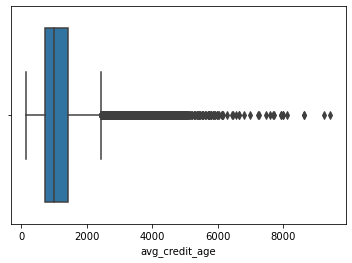

In [30]:
sns.boxplot(x=loan["avg_credit_age"])

In [31]:
#loan['avg_credit_age'] = loan['avg_credit_age'].apply(lambda ls: 'Low' if ls < 1001 else ('Medium' if ls>10000 and ls<2000 else 'High'))

### Interest Rate Formatting:
1. First we can remove % sign from interest rate so that it can be compared in numbers
2. Divide it into low, medium and high to create categorized variable

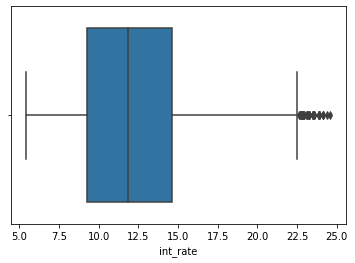

In [32]:
loan['int_rate'] = loan['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))
sns.boxplot(x=loan["int_rate"])
loan['int_rate'] = loan['int_rate'].apply(lambda ls: 'less than 11 %' if ls < 11 else ('Less than 15%' if ls>=11 and ls<15 else 'More than 15%'))

### Loan Status Formating:
1. Remove Current type of Loan status as we are only looking at Defaut or not default.
2. Convert Fully Paid =0 and Default(Charged off)=1 for easy calculations.

In [33]:

loan = loan[loan['loan_status'] != 'Current']
loan['loan_status'] = loan['loan_status'].apply(lambda ls: 0 if ls=='Fully Paid' else 1)
loan['loan_status'] = loan['loan_status'].apply(lambda ls: pd.to_numeric(ls))
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,cr_line_month,cr_line_year,earliest_cr_date,credit_age,avg_credit_age
0,5000,5000,4975.0,36 months,less than 11 %,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,0,credit_card,AZ,27.65,Jan-85,1,3,0,13648,83.70%,9,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,1,1985,1985-01-01,13371 days,4457
1,2500,2500,2500.0,60 months,More than 15%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,1,car,GA,1.00,Apr-99,5,3,0,1687,9.40%,4,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,4,1999,1999-04-01,8168 days,2722
2,2400,2400,2400.0,36 months,More than 15%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,0,small_business,IL,8.72,Nov-01,2,2,0,2956,98.50%,10,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,11,2001,2001-11-01,7223 days,3611
3,10000,10000,10000.0,36 months,Less than 15%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,0,other,CA,20.00,Feb-96,1,10,0,5598,21%,37,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,2,1996,1996-02-01,9323 days,932
5,5000,5000,5000.0,36 months,less than 11 %,156.46,A,A4,3 years,RENT,36000.0,Source Verified,2011-12-01,0,wedding,AZ,11.20,Nov-04,3,9,0,7963,28.30%,12,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,11,2004,2004-11-01,6127 days,680


Checking Distribution of Loan Defaults in Dataset

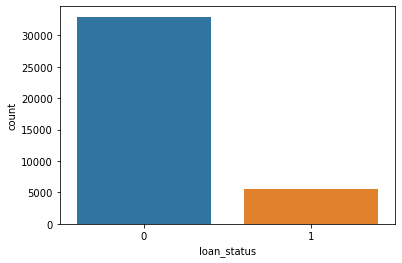

In [34]:
sns.countplot( x='loan_status', data=loan)
plt.show()

In [35]:
#Dataset where all are default loan cases 
loandefault = loan[loan['loan_status'] == 1]


## Bivariate Anaysis
For Bivariate analysis we would be checking impact of each variable on Loan Ststus

#### Grade and sub-grade are categories in which lending club categorized each loan case
#### from plots below, we can see that default increases as grade and sub grade of loan moved from A to G

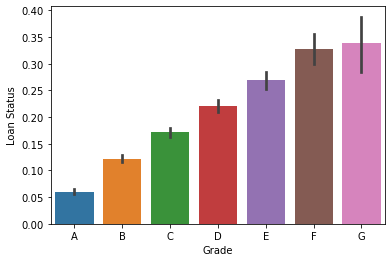

In [36]:
# plotting Loan Status across grade of the loan
loan=loan.sort_values(by=['grade'])
chart=sns.barplot(x='grade', y='loan_status', data=loan)
chart.set(xlabel="Grade", ylabel="Loan Status")
plt.show()

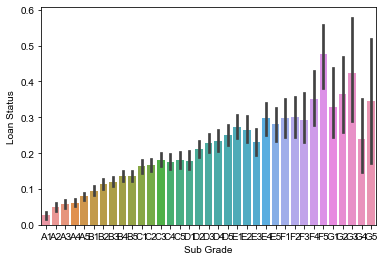

In [37]:
# plotting Loan Status across Sub grade of the loan
loan=loan.sort_values(by=['sub_grade'])
chart=sns.barplot(x='sub_grade', y='loan_status', data=loan)
sns.set(rc={"figure.figsize":(30, 10)})
chart.set(xlabel="Sub Grade", ylabel="Loan Status")
plt.show()

#### Loan term against Loan Status
Loan term has two values 36 Months and 60 Months. We could have removed Months from values for numerical calculations.
But, We use this as categorical variable and plot against Loan Status

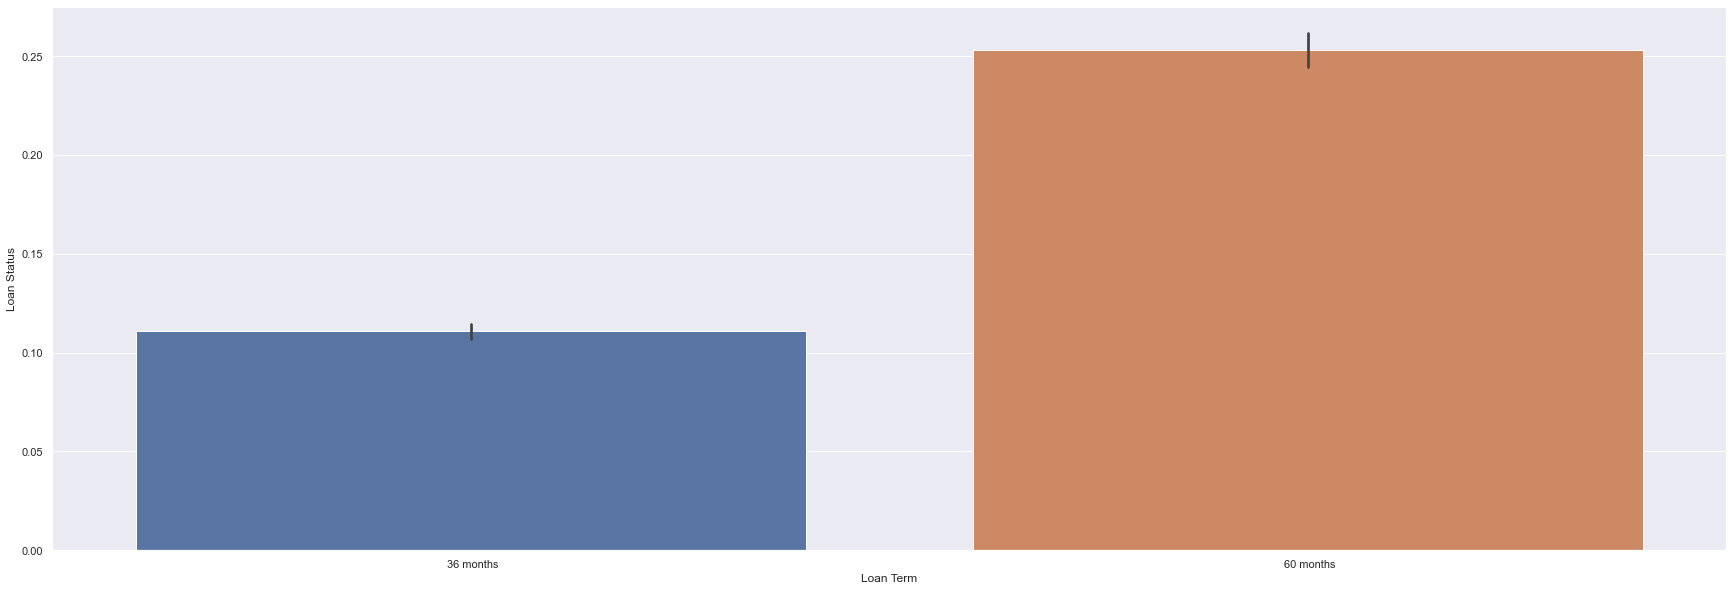

In [38]:
# plotting default rates across grade of the loan
chart=sns.barplot(x='term', y='loan_status', data=loan)
chart.set(xlabel="Loan Term", ylabel="Loan Status")
plt.show()

#### Loan Amount against Loan Status
First we convert Loan amount to categorized values.
Loan amount of less than 10000 is categorized as "Less than 10000"
Loan amount of between 10000 and 20000 is categorized as "Less than 20000"
Loan amount of More than 10000 is categorized as "More than 20000"


<AxesSubplot:xlabel='loan_amnt'>

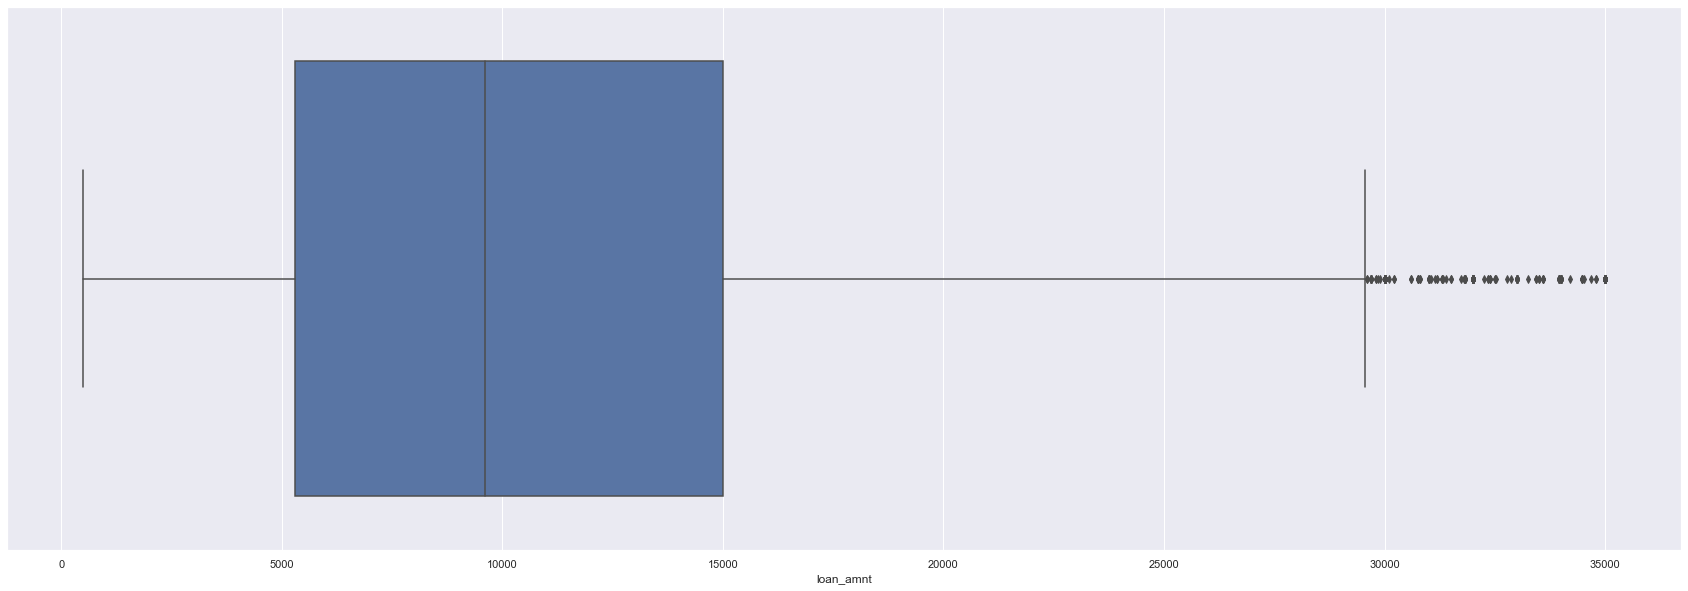

In [39]:
sns.boxplot(x=loan["loan_amnt"])

In [40]:
loan=loan.sort_values(by=['loan_amnt'])
loan['loan_amnt'] = loan['loan_amnt'].apply(lambda ls: 'less than 10000' if ls < 10001 else ('Less than 20000' if ls>10000 and ls<20000 else 'More than 20000'))


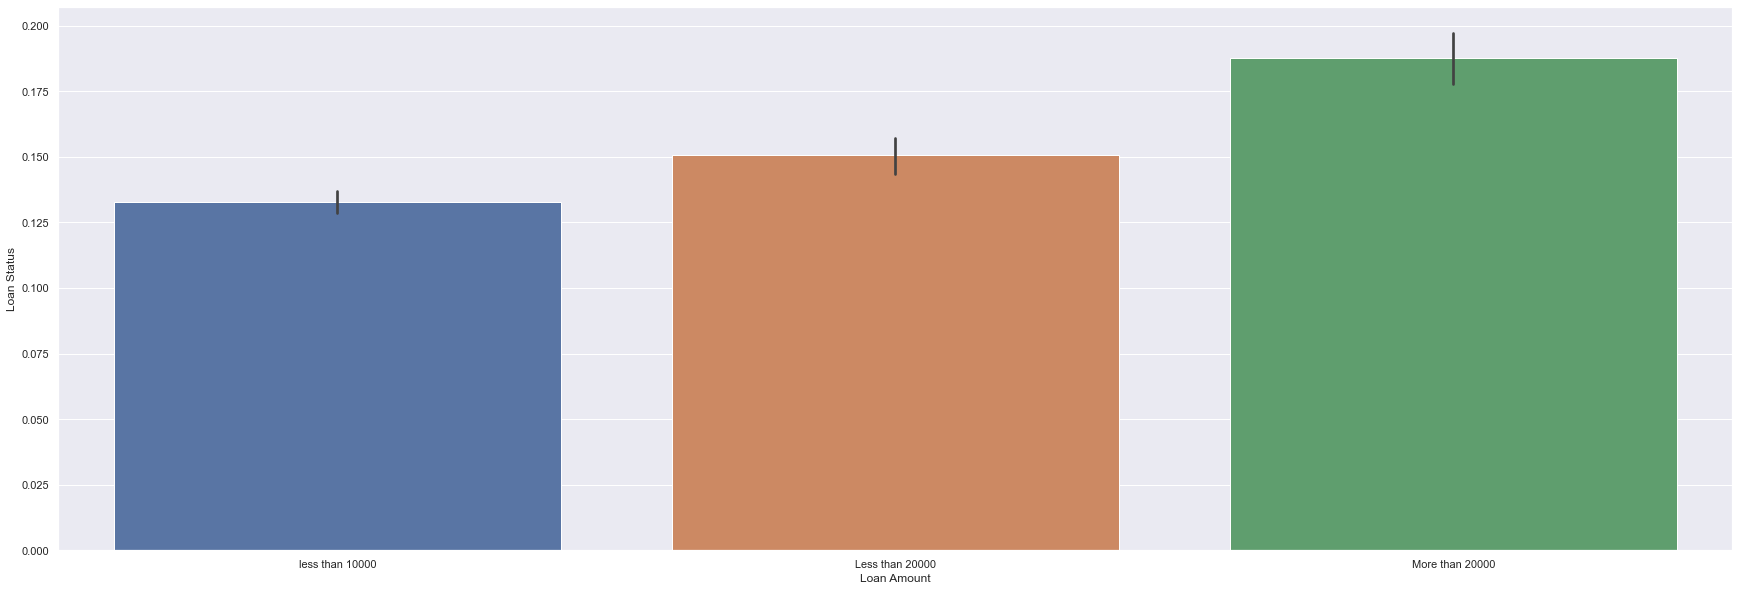

In [41]:
# plotting Loan Amount against Status of the loan
chart=sns.barplot(x='loan_amnt', y='loan_status', data=loan)
chart.set(xlabel="Loan Amount", ylabel="Loan Status")
plt.show()

### Interest Rate against Loan Status

To check impact of interest rate, we categorize interest rate into three bins. Less than 11%, Less than 15 % and more than 15 %
From the plot belowm we can see that as interest rate increased , defaults also increased.

In [42]:
loan["int_rate"].describe()

count              38577
unique                 3
top       less than 11 %
freq               16324
Name: int_rate, dtype: object

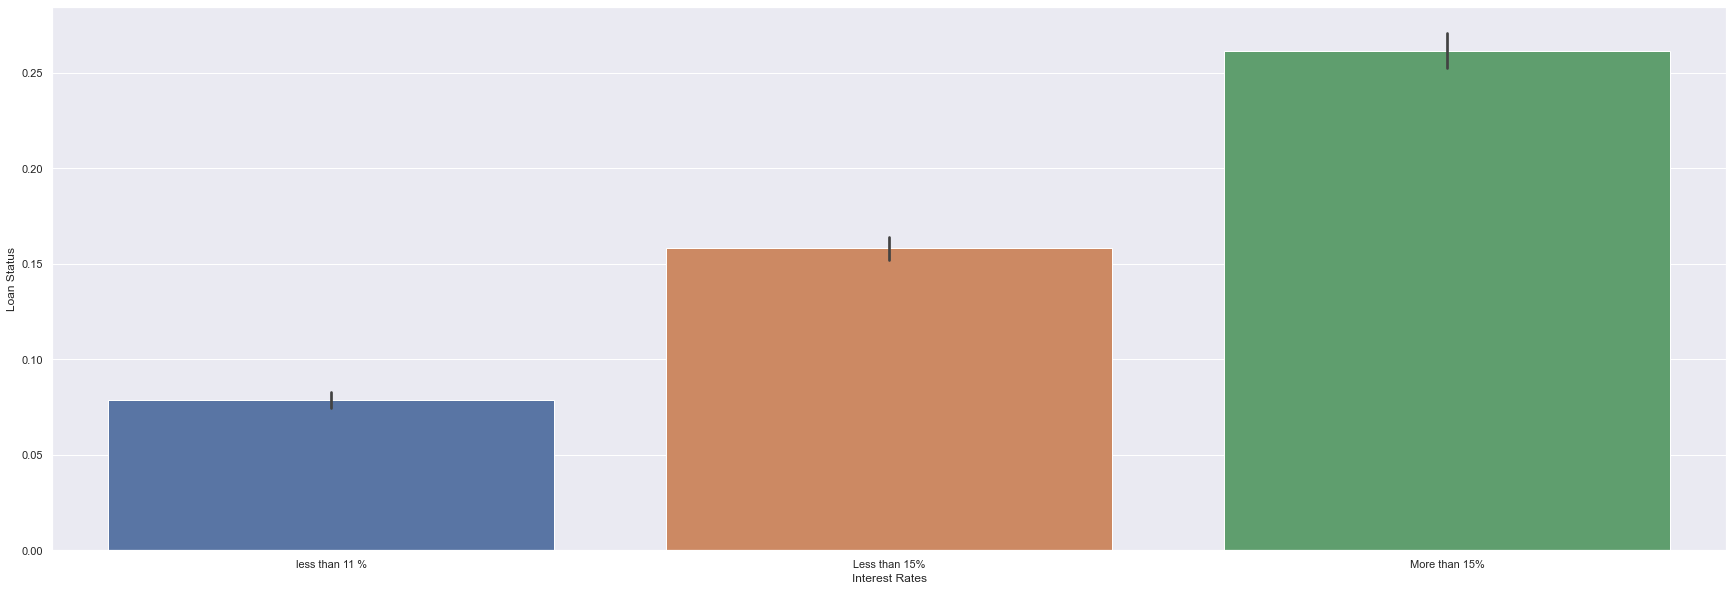

In [43]:
# Plotting Interest rates with Loan default status
chart=sns.barplot(x='int_rate', y='loan_status', data=loan)
chart.set(xlabel="Interest Rates", ylabel="Loan Status")
plt.show()

In [44]:
loan.describe()

,funded_amnt,funded_amnt_inv,installment,annual_inc,loan_status,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,cr_line_month,cr_line_year,credit_age,avg_credit_age
count,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577,38577.000000
mean,10784.058506,10222.481123,322.466318,6.877797e+04,0.145864,13.272727,0.871737,9.275423,0.055422,13289.489826,22.052648,11866.970365,11271.196153,9648.322898,2119.243370,1.368634,98.035545,12.772728,2746.243218,6.894004,1996.604816,8953 days 23:33:34.309044224,1193.522358
std,7090.306027,7022.720644,208.639215,6.421868e+04,0.352975,6.673044,1.071546,4.401588,0.237804,15866.492241,11.425861,8809.856227,8700.845592,7009.381200,2389.499511,7.315880,698.650182,150.836853,4494.648131,3.539057,6.815696,2491 days 20:30:45.608613248,706.643668
min,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1946.000000,4666 days 00:00:00,147.000000
25%,5200.000000,5000.000000,165.740000,4.000000e+04,0.000000,8.130000,0.000000,6.000000,0.000000,3650.000000,13.000000,5513.497338,5019.590000,4500.000000,643.990000,0.000000,0.000000,0.000000,217.420000,4.000000,1993.000000,7284 days 00:00:00,739.000000
50%,9550.000000,8733.440000,277.860000,5.886800e+04,0.000000,13.370000,1.000000,9.000000,0.000000,8762.000000,20.000000,9674.048405,9066.660000,8000.000000,1300.450000,0.000000,0.000000,0.000000,568.260000,7.000000,1998.000000,8503 days 00:00:00,1013.000000
75%,15000.000000,14000.000000,425.550000,8.200000e+04,0.000000,18.560000,1.000000,12.000000,0.000000,16912.000000,29.000000,16136.952430,15329.780000,13175.000000,2671.980000,0.000000,0.000000,0.000000,3447.250000,10.000000,2001.000000,10115 days 00:00:00,1423.000000
max,35000.000000,35000.000000,1305.190000,6.000000e+06,1.000000,29.990000,8.000000,44.000000,4.000000,149588.000000,90.000000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,12.000000,2008.000000,27616 days 00:00:00,9440.000000


### Annual Income against Loan Status

To find relationship of Anual income with loan status, we are dividing income into 4 bins and making it a categorized variable.
Income Less than 50000 is considered low
Income between 50000 to 100000 is considered Medium
Income between 100000 to 150000 is considered High
Income more than 150000 is considered very high


In [45]:
loan["annual_inc"].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [46]:
loan=loan.sort_values(by=['annual_inc'])
loan['annual_inc'] = loan['annual_inc'].apply(lambda ls: 'Low' if ls < 50001 else ('Medium' if ls>50000 and ls<100001 else ('High' if ls>100000 and ls<150001 else 'Very High')))

In [47]:
loan["annual_inc"].describe()

count      38577
unique         4
top       Medium
freq       17706
Name: annual_inc, dtype: object

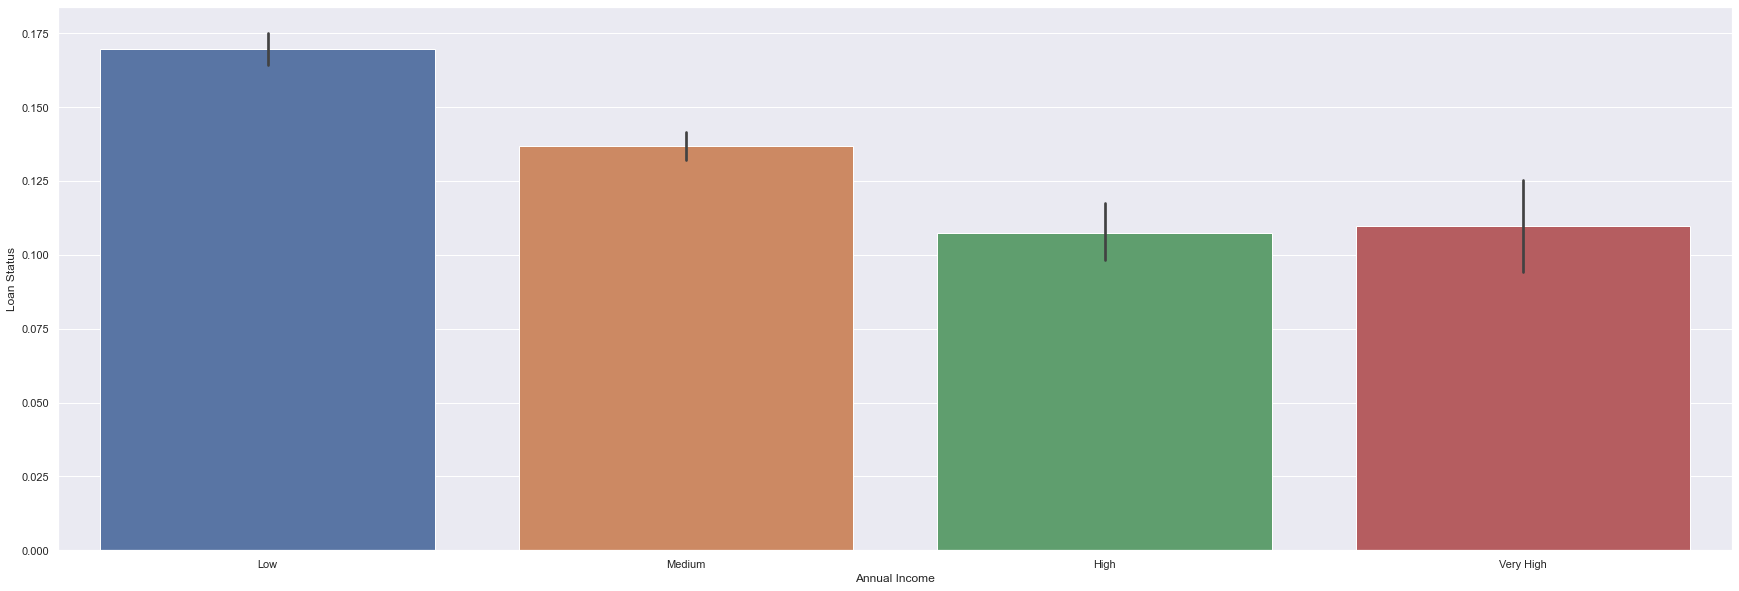

In [48]:
# Plotting Annual Income with Loan default status

chart=sns.barplot(x='annual_inc', y='loan_status', data=loan)
chart.set(xlabel="Annual Income", ylabel="Loan Status")
plt.show()

#### Home Ownership Against Loan Status
Home Ownership is a categorized variable with values as- 
1. OWN
2. RENT
3. MORTGAGE
4. OTHER

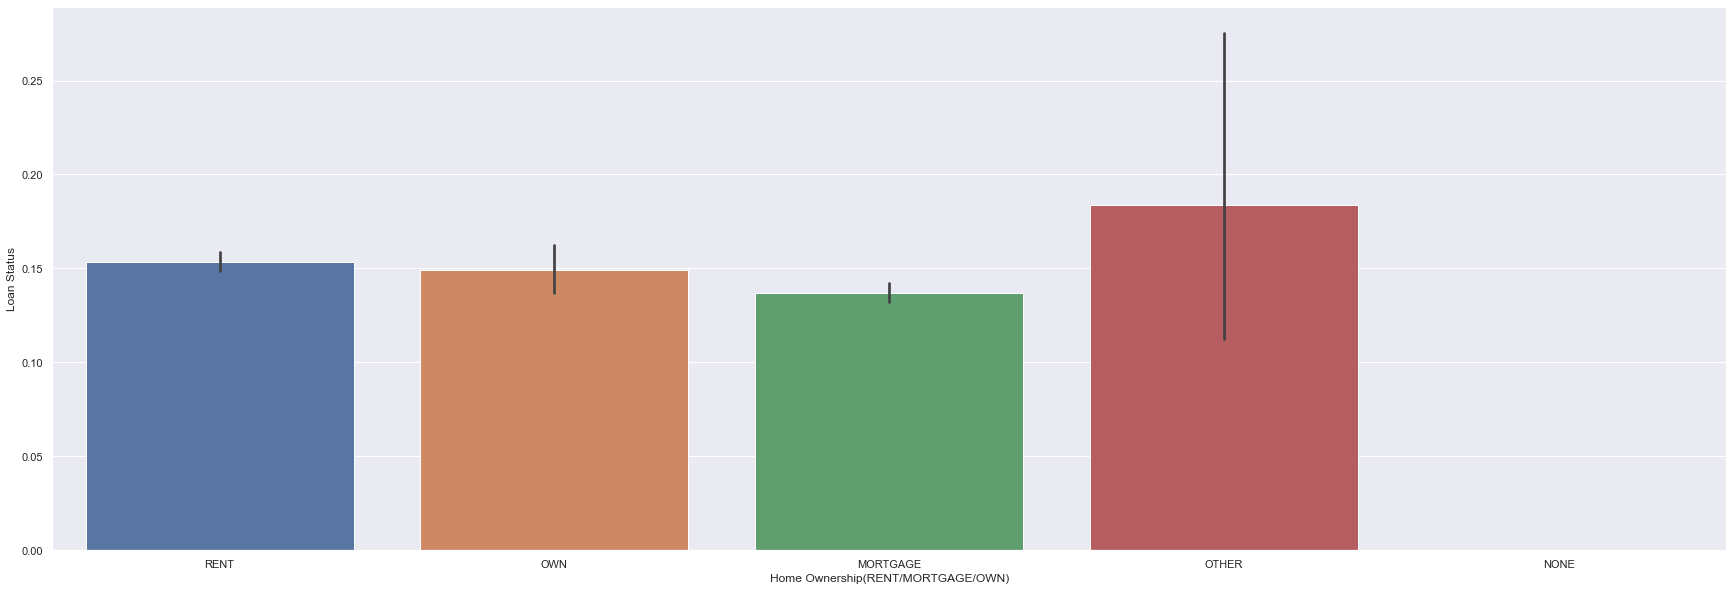

In [49]:
# Plotting Home Ownership with Loan default status
chart=sns.barplot(x='home_ownership', y='loan_status', data=loan)
chart.set(xlabel="Home Ownership(RENT/MORTGAGE/OWN)", ylabel="Loan Status")
plt.show()

#### Address State against Loan Status
This will help us identify states that have maximum number of defaults and default percentage.


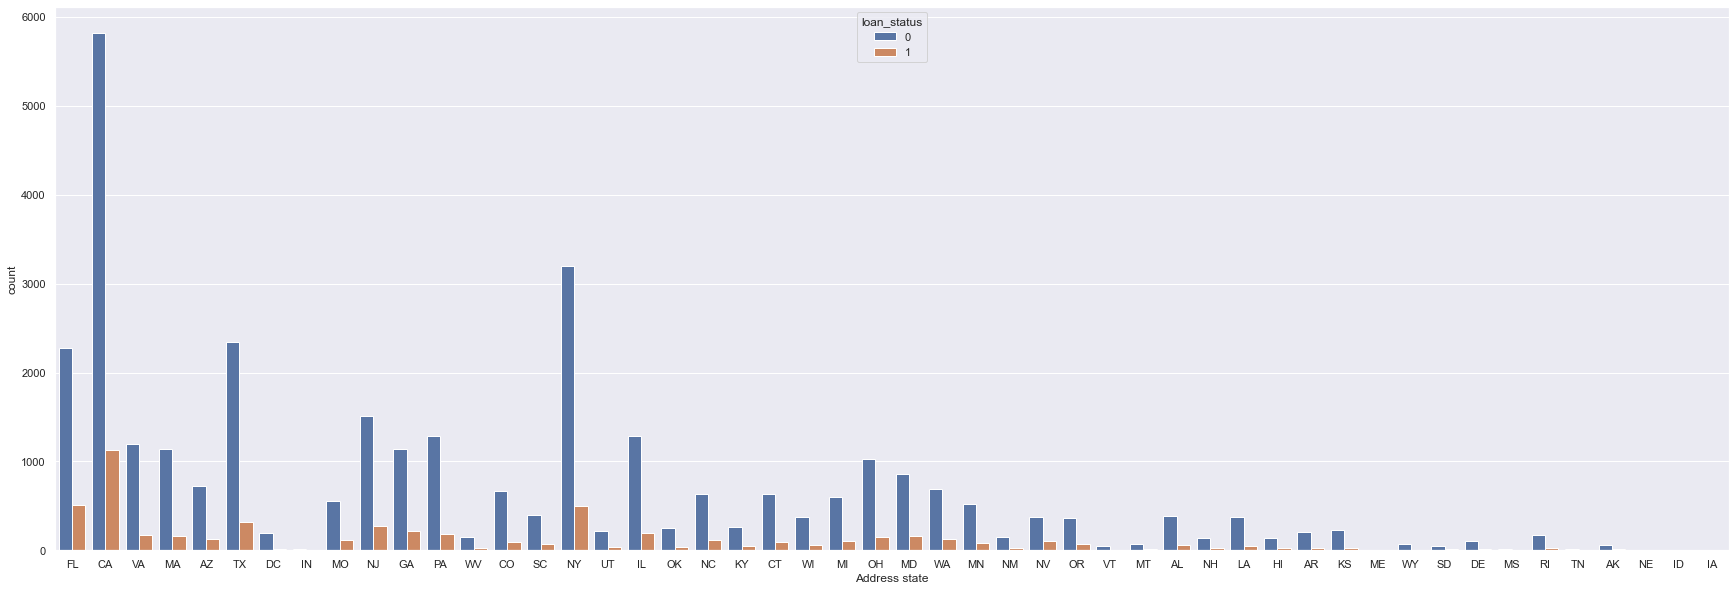

In [50]:
sns.countplot(x='addr_state', hue='loan_status', data=loan)
plt.xlabel('Address state')

plt.show()

#### Purpose against Loan status
This will help us find out why peope tok most loans and who did not pay it back

In [51]:
# Plotting Purpose of Loan with Loan default status

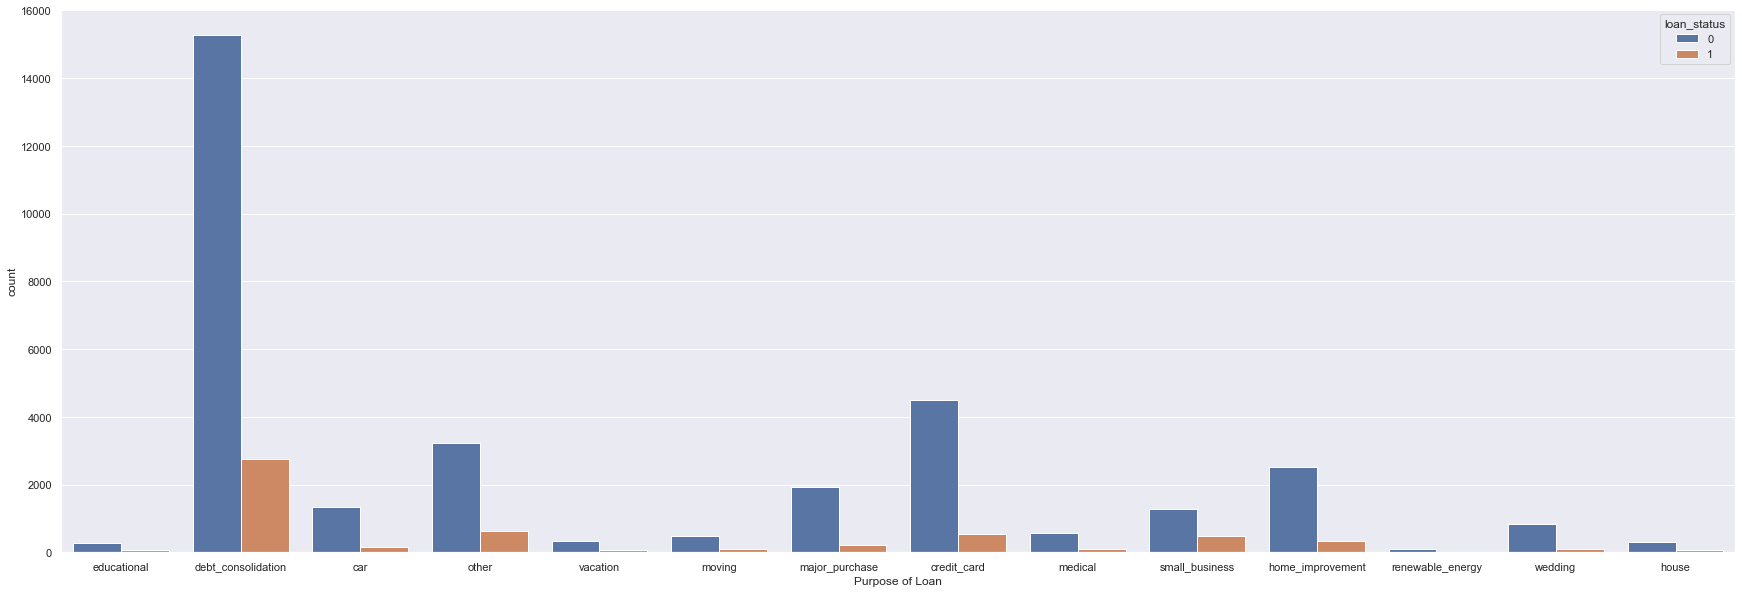

In [52]:
sns.countplot(x='purpose', hue='loan_status', data=loan)
plt.xlabel('Purpose of Loan')

plt.show()

<AxesSubplot:xlabel='dti'>

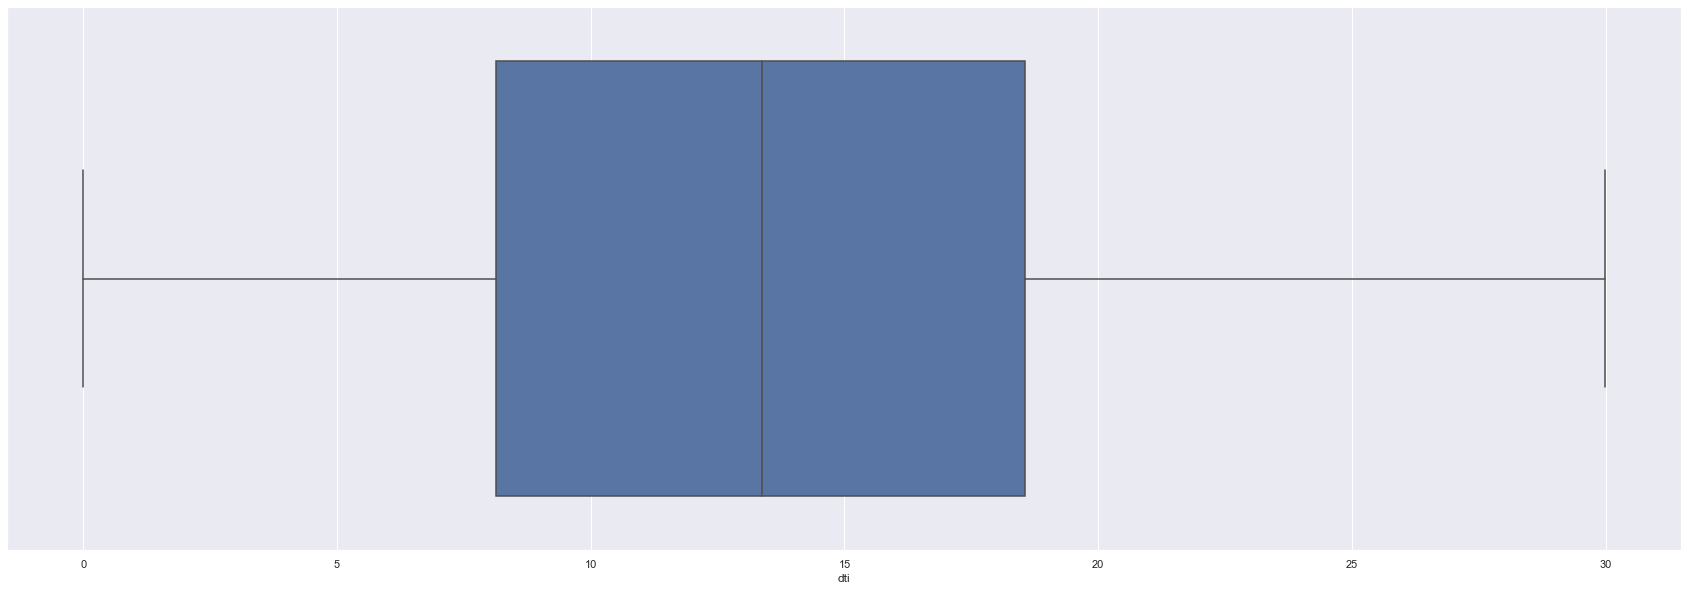

In [53]:
sns.boxplot(x=loan["dti"])

### Debt to Income Ratio against Loan status
This will help us identify how dti impacted loan status

In [54]:
loan['dti'] = loan['dti'].apply(lambda ls: 'Low' if ls < 11 else ('Medium' if ls>=11 and ls<=15 else 'High') )


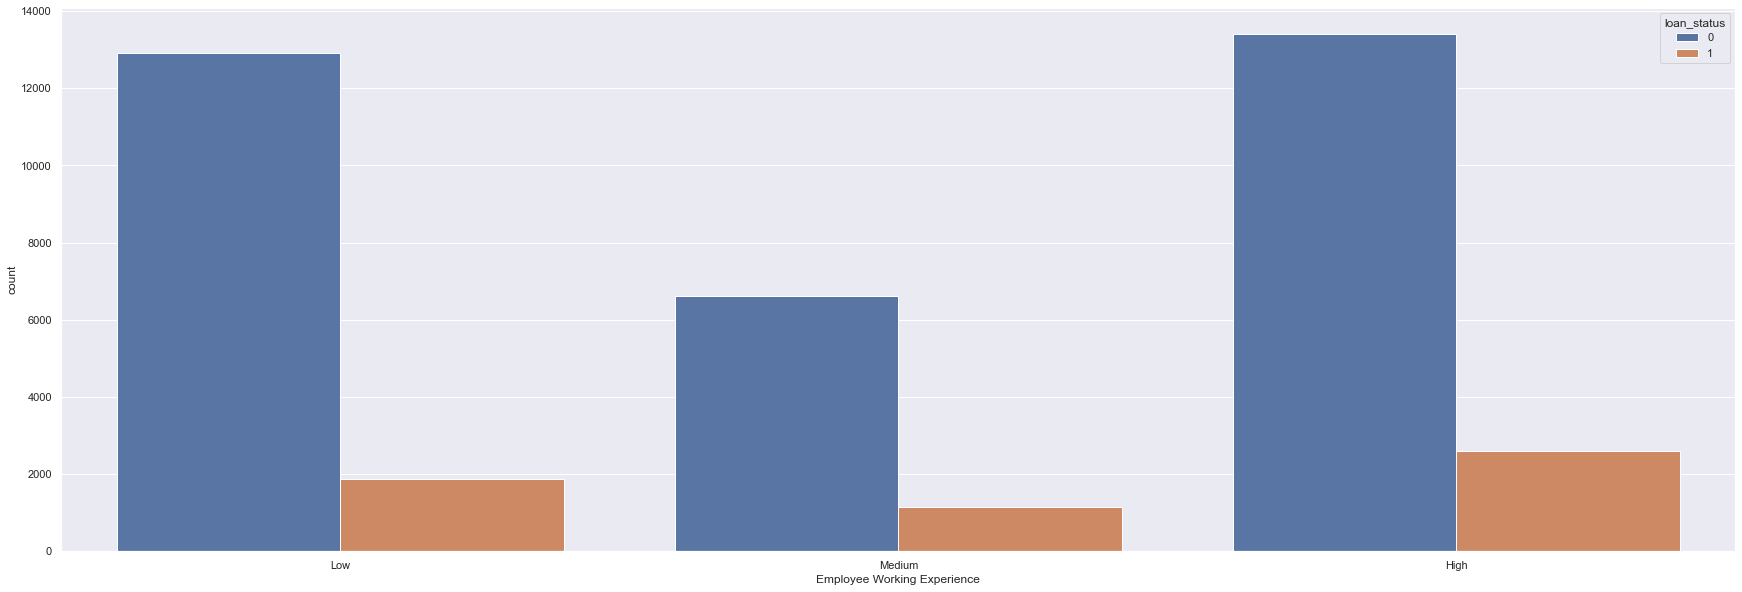

In [55]:
sns.countplot(x='dti', hue='loan_status', data=loan)
plt.xlabel('Employee Working Experience')

plt.show()

In [56]:

loan['emp_length'] = loan['emp_length'].str.rstrip('years ')
loan['emp_length'].replace({'10+': '10'}, inplace=True)
loan['emp_length'].replace({'< 1': '1'}, inplace=True)


#loan['emp_length']=loan['emp_length'].replace({'years': ''}, inplace=True)
#loan['emp_length']=loan['emp_length'].replace({'+': ''}, inplace=True)
#loan['emp_length']=loan['emp_length'].replace({'<': ''}, inplace=True)
#loan['emp_length']=loan['emp_length'].replace({'>': ''}, inplace=True)
#loan['emp_length']=loan['emp_length'].replace({' ': ''}, inplace=True)

In [57]:
loan['emp_length'].head()

35501      1
29283      1
30726    NaN
37709      3
36639      1
Name: emp_length, dtype: object

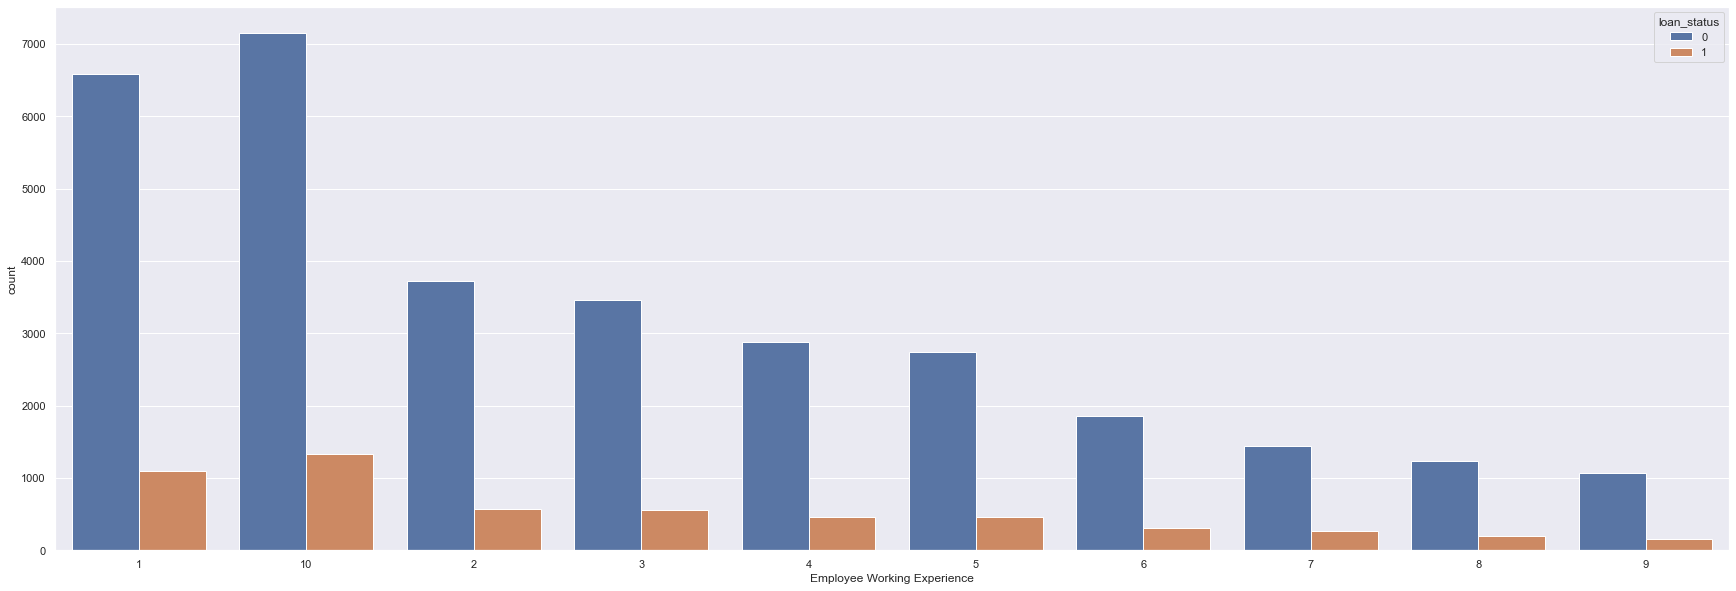

In [58]:
loan=loan.sort_values(by=['emp_length'])
sns.countplot(x='emp_length', hue='loan_status', data=loan)
plt.xlabel('Employee Working Experience')

plt.show()

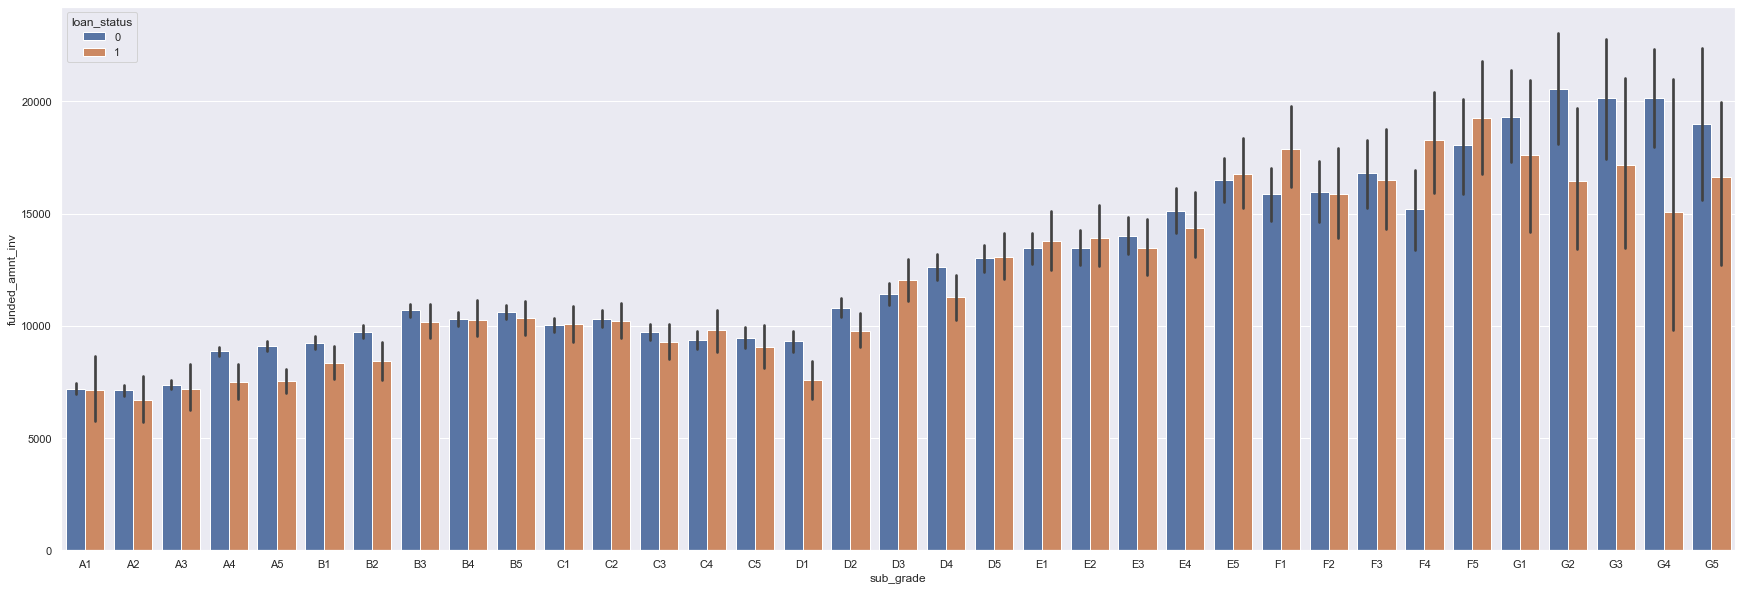

In [59]:
#Plot of sub_grade vs investor loan amount, broken by loan status
# sub_grade is an indicator of risk elevel 
sns.barplot(data=loan.sort_values('sub_grade'),x='sub_grade', y = 'funded_amnt_inv' ,hue='loan_status')
plt.show()

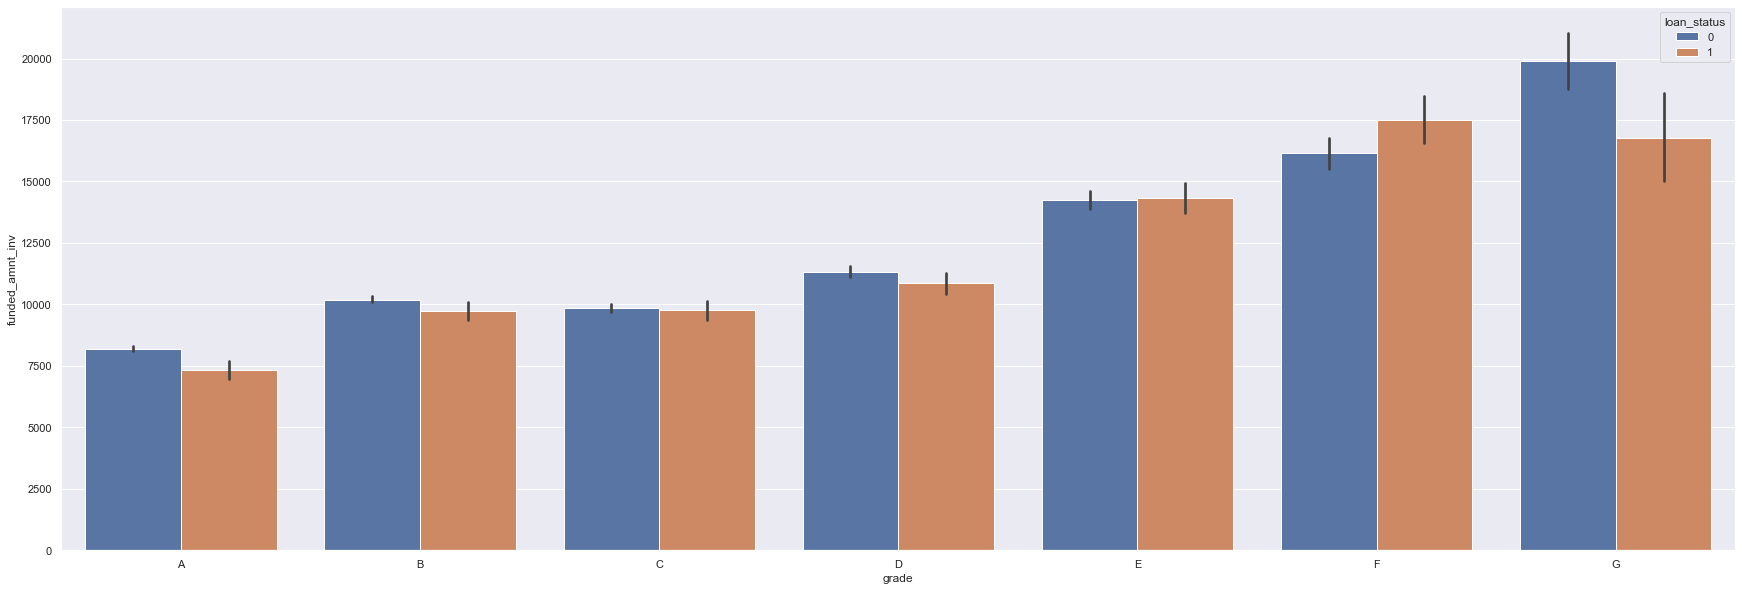

In [60]:
#Plot of grade vs investor loan amount, broken by loan status
# sub_grade/grade is an indicator of risk elevel
sns.barplot(data=loan.sort_values('grade'),x='grade',y = 'funded_amnt_inv' ,hue='loan_status')
plt.show()

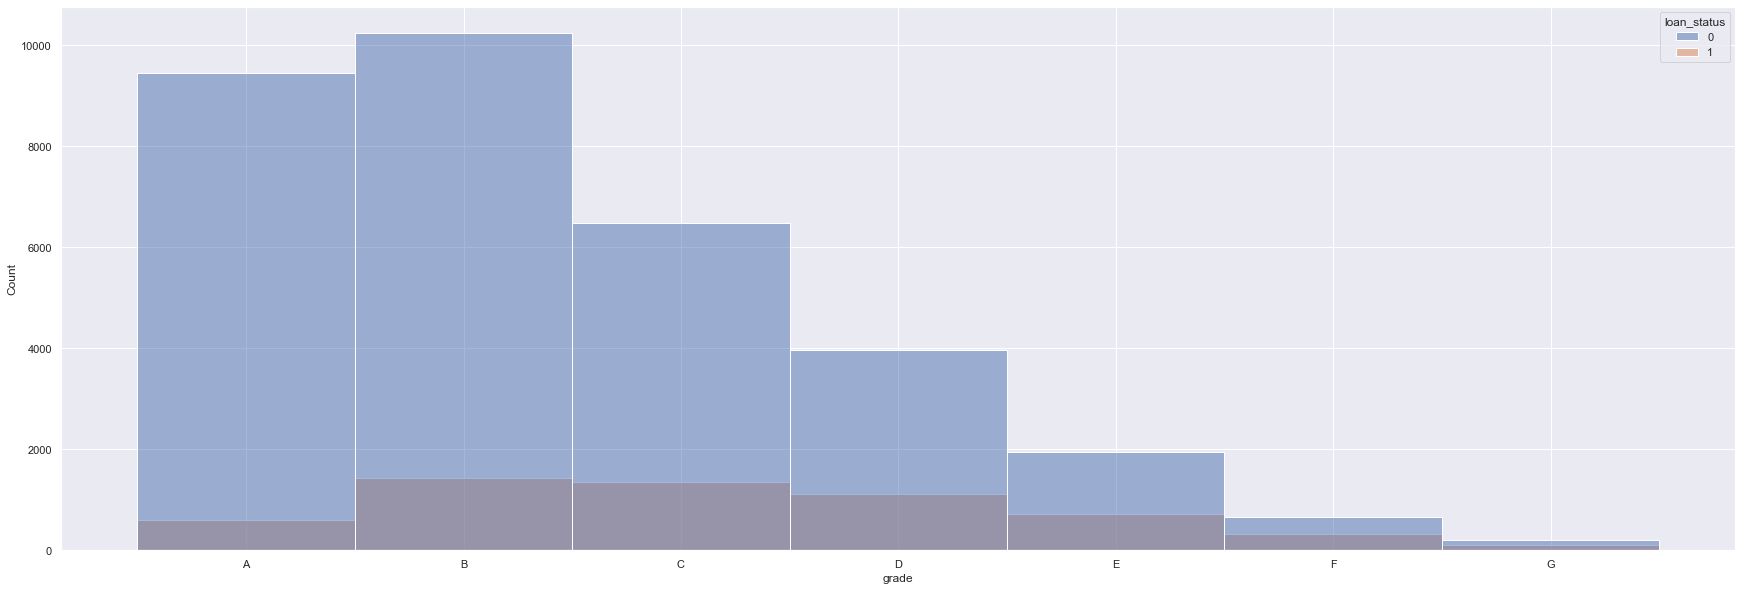

In [61]:
#Plot of grade counts by loan status
# sub_grade/grade is an indicator of risk elevel
sns.histplot(data=loan.sort_values('grade'),x='grade',hue='loan_status')
plt.show()

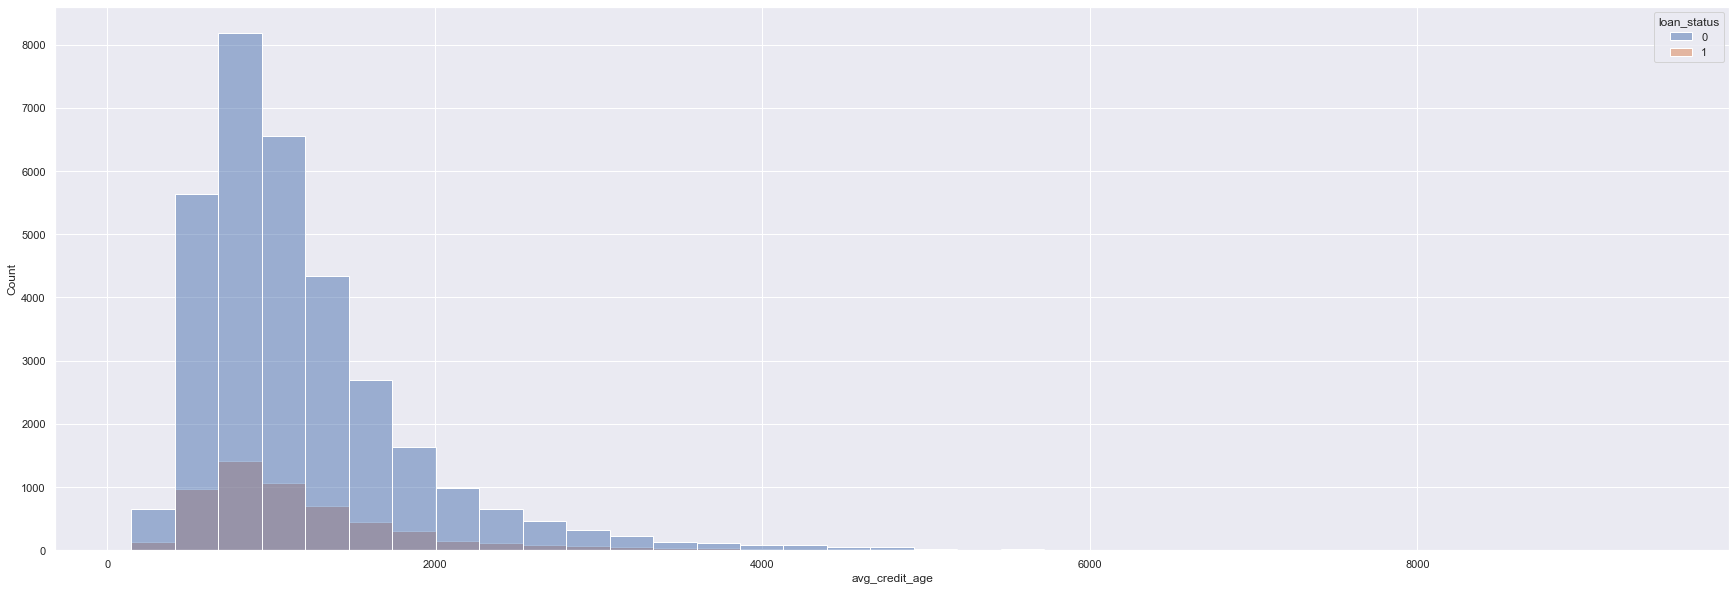

In [62]:
#Hist plot of avg_credit_age counts by loan status
sns.histplot(data=loan.sort_values('avg_credit_age'),x='avg_credit_age',hue='loan_status',bins=35)
plt.show()

### Revenue Calculation
This will help to understand the margin. 
In case of "Paid off" loans, the lending club makes additional money from the paid interest, apart from the principal thats paid back.
In case of defaulters, the entire loan amount may not be a loss. Few of the installments paid, will cover part of the loan amount.

Funds Given: funded_amnt 
Funds Received: total_pymnt 
Profit/Loss = funded_amnt - total_pymnt

In [74]:
loan['pnl'] = loan.total_pymnt - loan.funded_amnt

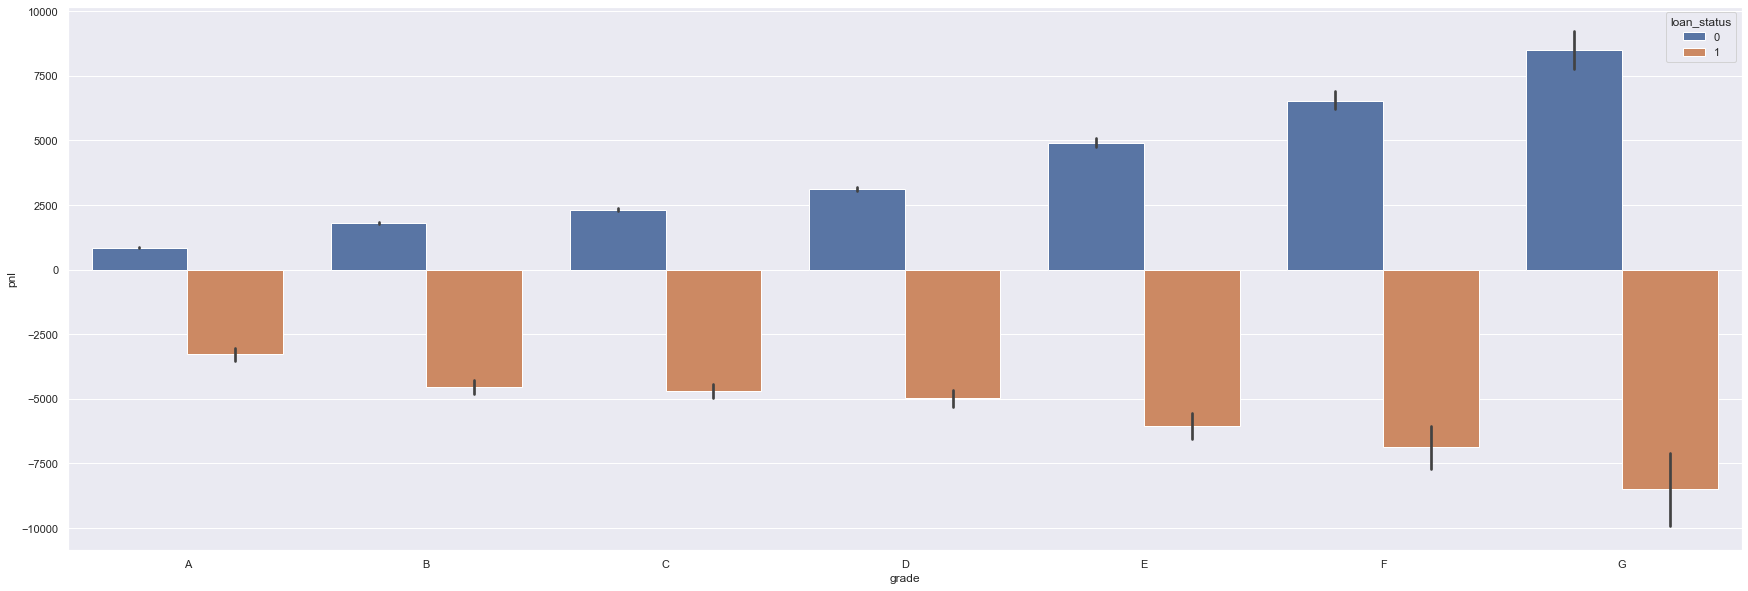

In [75]:
#Plot of grade vs pnl amount, broken by loan status
# sub_grade/grade is an indicator of risk elevel
sns.barplot(data=loan.sort_values('grade'),x='grade',y = 'pnl' ,hue='loan_status')
plt.show()

In [77]:
loan.head(25)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,cr_line_month,cr_line_year,earliest_cr_date,credit_age,avg_credit_age,pnl
35501,less than 10000,2000,2000.000000,36 months,Less than 15%,67.61,C,C2,1,RENT,Low,Not Verified,2009-08-01,0,educational,FL,Low,Jul-06,2,6,0,598,54.40%,6,2433.582616,2433.58,2000.00,433.58,0.000000,0.00,0.0000,2012-09-01,70.20,2012-08-01,7,2006,2006-07-01,5520 days,920,433.582616
32130,less than 10000,5800,5800.000000,36 months,Less than 15%,199.90,D,D1,1,RENT,Medium,Not Verified,2010-02-01,0,car,NY,Low,Oct-06,0,5,0,4372,48%,5,7196.585705,7196.59,5800.01,1396.58,0.000000,0.00,0.0000,2013-03-01,207.30,2016-04-01,10,2006,2006-10-01,5428 days,1085,1396.585705
37306,Less than 20000,12000,11925.000000,36 months,Less than 15%,401.60,C,C1,1,RENT,Low,Not Verified,2009-03-01,0,wedding,PA,Medium,Sep-02,1,6,0,8123,57.20%,12,13394.625190,13310.91,12000.00,1394.63,0.000000,0.00,0.0000,2010-04-01,8580.83,2016-05-01,9,2002,2002-09-01,6919 days,1153,1394.625190
38896,less than 10000,8000,6784.120000,36 months,Less than 15%,262.03,C,C1,1,RENT,Low,Not Verified,2008-04-01,0,credit_card,TX,Medium,Nov-03,0,6,0,8158,57%,9,9432.794352,7975.38,7999.99,1432.80,0.000000,0.00,0.0000,2011-04-01,287.23,2014-06-01,11,2003,2003-11-01,6493 days,1082,1432.794352
24349,Less than 20000,10800,10725.000000,36 months,less than 11 %,346.57,B,B3,1,RENT,Medium,Verified,2010-10-01,0,debt_consolidation,VA,High,Apr-04,0,16,0,5877,38.70%,23,11433.933030,11354.53,10800.00,633.93,0.000000,0.00,0.0000,2011-07-01,9014.79,2012-02-01,4,2004,2004-04-01,6341 days,396,633.933030
11837,less than 10000,7800,7725.000000,60 months,Less than 15%,177.44,C,C1,1,RENT,Medium,Not Verified,2011-07-01,1,other,CO,Medium,Jan-06,1,6,0,4304,29.90%,9,6435.280000,6373.19,3639.11,2216.41,0.000000,579.76,5.7976,2014-05-01,42.18,2014-09-01,1,2006,2006-01-01,5701 days,950,-1364.720000
17837,Less than 20000,14000,14000.000000,60 months,More than 15%,337.86,D,D4,1,RENT,Low,Not Verified,2011-03-01,0,credit_card,MI,High,Nov-03,0,7,0,13533,80.10%,13,19895.080020,19895.08,14000.00,5895.08,0.000000,0.00,0.0000,2015-03-01,4369.32,2015-03-01,11,2003,2003-11-01,6493 days,927,5895.080020
23104,More than 20000,12950,12410.233790,36 months,less than 11 %,397.15,A,A4,1,RENT,Medium,Verified,2010-12-01,0,major_purchase,CA,Medium,Feb-96,0,12,0,3915,4.40%,28,14284.811470,13659.39,12950.00,1334.81,0.000000,0.00,0.0000,2013-09-01,1597.98,2013-09-01,2,1996,1996-02-01,9323 days,776,1334.811470
20723,Less than 20000,10500,10500.000000,36 months,less than 11 %,336.99,B,B1,1,RENT,Medium,Source Verified,2011-01-01,0,debt_consolidation,FL,High,Oct-01,0,12,0,28604,77.30%,31,10962.626890,10962.63,10500.00,462.63,0.000000,0.00,0.0000,2011-09-01,3160.73,2016-05-01,10,2001,2001-10-01,7254 days,604,462.626890
4296,More than 20000,20000,20000.000000,60 months,More than 15%,523.45,E,E3,1,MORTGAGE,Medium,Verified,2011-11-01,0,debt_consolidation,LA,High,May-95,0,10,0,40882,55.10%,29,29710.680000,29710.68,20000.00,9710.68,0.000000,0.00,0.0000,2015-02-01,9842.23,2016-05-01,5,1995,1995-05-01,9599 days,959,9710.680000


### Conclusion

In [64]:
loan.to_csv(r'loan2.csv', index= 'False')